# Greetings to All: Understanding the Concepts of Scraping

In today's digital age, we use the internet every day without fully understanding how it works. It's incredible how technology has advanced to a point where we don't need to comprehend its intricacies to benefit from it. Yet, some tasks require a deeper knowledge.

## Abstract View of the Infrastructure Required to Get Information to Your Browser

Alice owns a web server. Bob uses a desktop computer, which is trying to connect to Alice’s server. When one machine wants to talk to another machine, something like the following exchange takes place:

1. **Initiation by Bob's Computer:**
    - Bob’s computer sends a stream of 1 and 0 bits, indicated by high and low voltages on a wire. These bits form some information, containing a header and body. The header contains:
        - Immediate destination: Bob’s local router’s MAC address
        - Final destination: Alice’s IP address
    - The body contains his request for Alice’s server application.

2. **Processing by Bob's Local Router:**
    - Bob’s local router receives the bits and interprets them as a packet from Bob’s MAC address, destined for Alice’s IP address.
    - The router stamps its own IP address as the “from” IP address and sends the packet off across the internet.

3. **Packet Traversal:**
    - Bob’s packet traverses several intermediary servers, which direct the packet toward the correct physical/wired path to Alice’s server.

4. **Reception by Alice's Server:**
    - Alice’s server receives the packet at her IP address.

5. **Packet Processing by Alice's Server:**
    - Alice’s server reads the packet port destination in the header and passes it off to the appropriate application—the web server application.
    - The packet port destination is almost always port 80 for web applications (analogous to an apartment number for packet data, whereas the IP address is like the street address).

6. **Web Server Application Handling:**
    - The web server application receives a stream of data from the server processor indicating:
        - This is a GET request.
        - The requested file is `index.html`.

7. **Response from Alice's Server:**
    - The web server locates the correct HTML file, bundles it up into a new packet to send to Bob.
    - The packet is sent through Alice’s local router, for transport back to Bob’s machine, through the same intermediary servers.

By understanding this process, we gain insight into the complexity and sophistication of the technology that powers our everyday internet experiences.


In [1]:
# A web browser can tell the processor to send data to the application that handles your wireless (or wired) interface, but you can do the same thing in Python with just few lines of code:

from urllib.request import urlopen

# urlopen si used to open remote object across a network and read it
html = urlopen('http://pythonscraping.com/pages/page1.html')

print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


## Welcoming of BeautfulSoup 

- library we can say thta is used for manipulation , modification of html body

In [3]:
# import of library
from bs4 import BeautifulSoup

### How Beutiful Soup Works :

- BeautifulSoup constructor takes various arguments :

    - `data ` : input string or html .
    - `parser ` : parser used.   default parser :  `html.parser`

In [4]:
# request data (html file) from server
html = urlopen('http://pythonscraping.com/pages/page1.html')

# 
data  = BeautifulSoup(html.read(), 'html.parser')

print(data.prettify())

<html>
 <head>
  <title>
   A Useful Page
  </title>
 </head>
 <body>
  <h1>
   An Interesting Title
  </h1>
  <div>
   Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
  </div>
 </body>
</html>



- There are multiple parser which can  be used by Beautiful Soup

    - `html.parser` : default parser
    - `xml` : pip install xml
    - `html5lib` : pip install html5lib


<div align = 'center'>
    <image src = "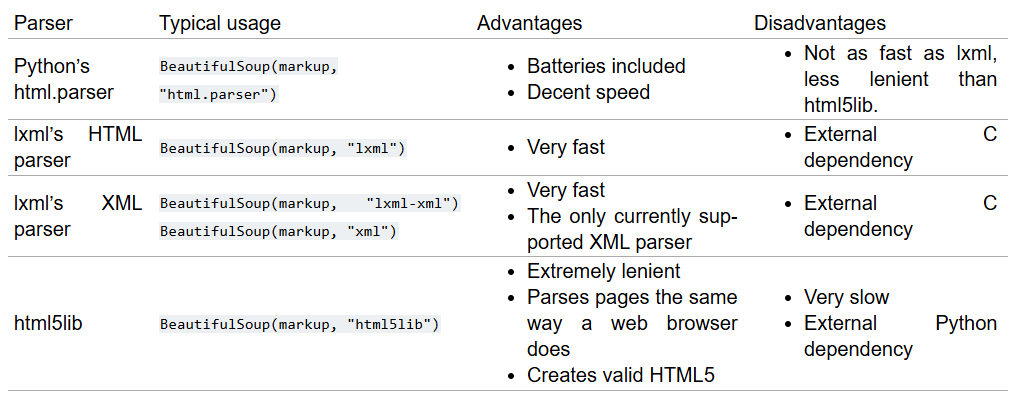"> </image>
</div>

- to increase speed and efficiency use `lxml`

In [6]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [8]:
#  to open html file 

with open("index.html") as file:
    data  = BeautifulSoup(file, "html.parser")

print(data.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Document
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
        and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>



## Reiable Connection and Exception handling

- Lets understand how to properly write a standard code which ensures every possible condition of failure . 

In [20]:
from urllib.request import urlopen
from urllib.request import HTTPError, URLError

from bs4 import BeautifulSoup

# function for parsing an url
def parse(url):
    try:
        html_doc = urlopen(url = url)
        return BeautifulSoup(html_doc.read(),'html.parser')
    except HTTPError as e :
        print(f"HTTP Error Occured. \n Code : {e.code} \n Error : {e.reason}")
    except URLError as e :
        print(f"URL Error Occurred: {e.reason}")
    except Exception as e :
        print(f"An unexpected error occurred: {e}")
        


In [21]:
# lets try

print(parse("google.com")) # error handled

print(parse('http://www.pythonscraping.com/pages/page1.html'))


An unexpected error occurred: unknown url type: 'google.com'
None
<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>



- `Reasons  of HTTPError` :

    - The page is not found on the server (or there was an error in retrieving it).
    - The server is not found.

- `Reason of URLError` :

    - The server is down.
    - The URL is mismatched.

In [25]:
# you can also do it with :
url = "http://www.pythonscraping.com/pages/page1.html"
data = parse(url)
if  data.header == None:
    print("something Wrong happened . Try to access invalid thing")
else:
    print(data.header)


if  data.div == None:
    print("something Wrong happened . Try to access invalid thing")
else:
    print(data.div)


something Wrong happened . Try to access invalid thing
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>


### All you need  : 3 objects

- Tags
- NavigableString
- Comment

In [3]:
from bs4 import BeautifulSoup
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [4]:
#to access tags simply call constructor with following tag
soup = BeautifulSoup(html_doc , "html.parser").p # it will parse the first p tag

print(soup)

<p class="title"><b>The Dormouse's story</b></p>


In [13]:
# you can access any tag once it goes thorup soup constructor

soup = BeautifulSoup(html_doc,'html.parser')

# accessing through tags
print(soup.a)
print(soup.p)
print(soup.title)

#  to get tag name 
print(f"Tag name : {soup.title.name}")

# to get info about attributes
print(f"Info About attributes : {soup.a.attrs}")

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<p class="title"><b>The Dormouse's story</b></p>
<title>The Dormouse's story</title>
Tag name : title
Info About attributes : {'href': 'http://example.com/elsie', 'class': ['sister'], 'id': 'link1'}


In [14]:
# We can even modify the atttributes
print(f"Before : {soup.a.attrs}")
soup.a["class"] = "brother"
print(f"After : {soup.a.attrs}")

Before : {'href': 'http://example.com/elsie', 'class': ['sister'], 'id': 'link1'}
After : {'href': 'http://example.com/elsie', 'class': 'brother', 'id': 'link1'}


In [16]:
# you can even delete the attributes
print(f"Before : {soup.a.attrs}")
del soup.a["class"]
print(f"After : {soup.a.attrs}")

Before : {'href': 'http://example.com/elsie', 'class': 'brother', 'id': 'link1'}
After : {'href': 'http://example.com/elsie', 'id': 'link1'}


In [19]:
# getting all links

for link in soup.find_all('a'):
    print(f"Link : {link.get('href')}")

Link : http://example.com/elsie
Link : http://example.com/lacie
Link : http://example.com/tillie
